
Download the dataset from the link below:
    https://www.kaggle.com/rakannimer/air-passenger-prediction

#### Importing the libraries

In [1]:
#import numpy 
import numpy as np
#import pandas
import pandas as pd
#import visualization library
import matplotlib.pyplot as plt

#### importing the dataset

In [2]:
#read the dataset
data=pd.read_csv('air_passengers.csv')

In [3]:
#check the first 5 rows of data
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#checking the shape of data
data.shape

(144, 2)

#### Taking care of Missing data

In [5]:
#checking the null values
data.isnull().any()

ds    False
y     False
dtype: bool

In [6]:
#rename the #passengers column name
data.rename(columns={"#Passengers": "Passengers"},inplace=True)

In [7]:
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Data Visualization

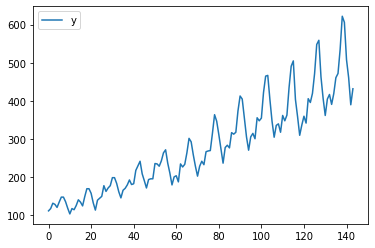

In [8]:
#We can plot the data easily in Pandas by calling the plot() function on the DataFrame.
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [9]:
data['ds']=pd.to_datetime(data['ds'], format='%Y-%m')

In [10]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
data.shape

(144, 2)

#### Forecast airline passengers traffic flow With Prophet

In [12]:
#import datetime conversion
from pandas import to_datetime
#prepare expected column names
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

In [13]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


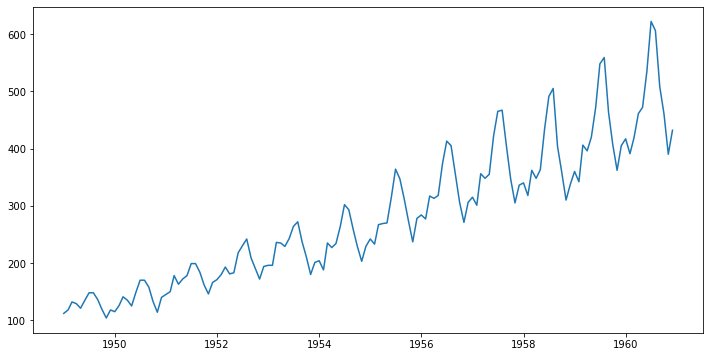

In [14]:
#visualizing the ds column
#configure the figure size
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

#### Model Building

In [15]:
#fit prophet model on the dataset

#import Prophet library from fbprophet
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(data)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Prediction

In [16]:
future_prediction = model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


#### Obtaining the forecastes

In [17]:
forecast=model.predict(future_prediction)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,57.647242,112.404853,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,50.169734,106.101221,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,82.607422,138.621599,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.176294,135.503127,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,81.795378,137.717795,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


#### summarize the forecast

In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.378677   57.647242  112.404853
1 1949-02-01   77.786826   50.169734  106.101221
2 1949-03-01  109.994541   82.607422  138.621599
3 1949-04-01  107.446903   78.176294  135.503127
4 1949-05-01  110.934953   81.795378  137.717795


#### plot forecast

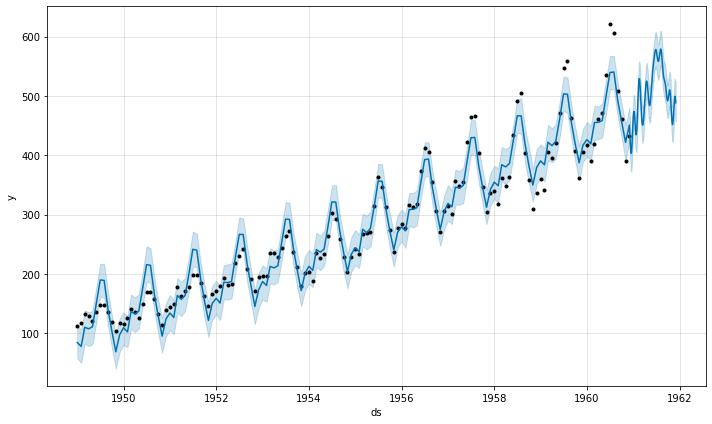

In [20]:
model.plot(forecast)
plt.show()

#### plotting the forecast components

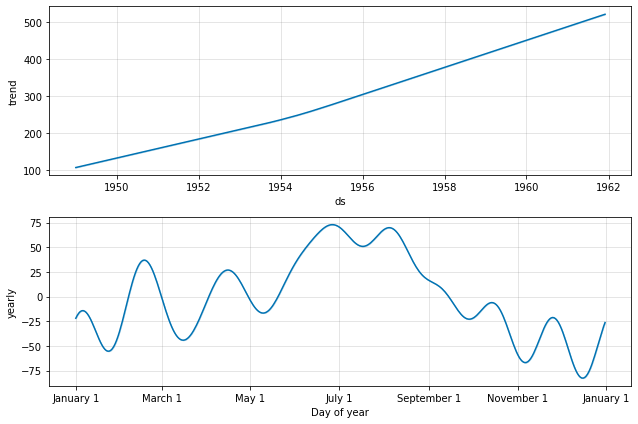

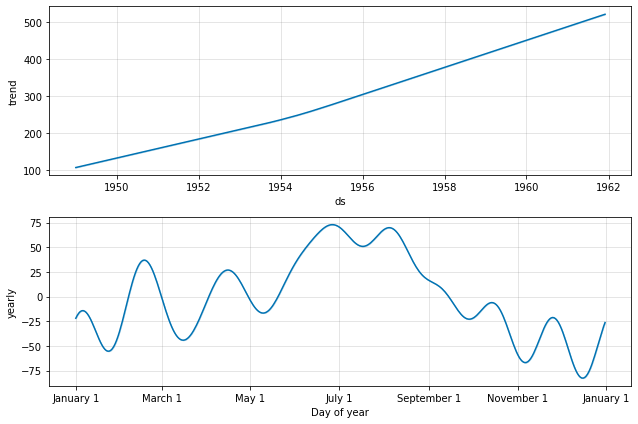

In [21]:
model.plot_components(forecast)

#### Cross Validation

In [22]:
from fbprophet.diagnostics import cross_validation

In [23]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,139.839784,139.791566,139.887124,170,1950-07-22
1,1950-09-01,159.165459,158.996559,159.337817,158,1950-07-22
2,1950-10-01,144.442711,144.116817,144.766416,133,1950-07-22
3,1950-11-01,77.628694,77.134704,78.158517,114,1950-07-22
4,1950-12-01,158.918801,158.231302,159.733201,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.079522,500.358437,552.781196,606,1959-12-02
236,1960-09-01,485.869209,461.086458,510.684967,508,1959-12-02
237,1960-10-01,452.202363,427.389947,478.452736,461,1959-12-02
238,1960-11-01,422.372655,395.065203,449.711586,390,1959-12-02


#### Evaluation of Model

In [24]:
from fbprophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1033.442083,32.147194,25.009051,0.079593,0.073811,0.208333
1,42 days,966.621945,31.090544,24.495749,0.078513,0.073811,0.166667
2,46 days,989.559780,31.457269,25.324207,0.079409,0.084098,0.125000
3,47 days,959.568402,30.976901,25.065133,0.078142,0.084098,0.125000
4,48 days,957.810331,30.948511,24.867530,0.076697,0.084098,0.166667


#### Visualizing the performance Metrics

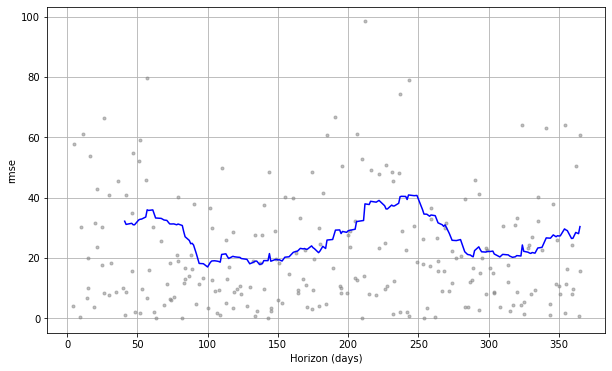

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

#### Save the Model

In [26]:
#import pickle
import pickle
pickle.dump(model,open('Airlines-prophet-1.pkl','wb'))


In [27]:
model=pickle.load(open('Airlines-prophet-1.pkl','rb'))

In [28]:
print(model.predict())

            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1949-01-01  106.320611   54.711506  112.855516   106.320611   106.320611   
1   1949-02-01  108.500995   50.815706  105.483660   108.500995   108.500995   
2   1949-03-01  110.470374   84.514418  140.168075   110.470374   110.470374   
3   1949-04-01  112.650758   79.244422  138.855528   112.650758   112.650758   
4   1949-05-01  114.760808   80.891977  138.487170   114.760808   114.760808   
..         ...         ...         ...         ...          ...          ...   
139 1960-08-01  472.278277  512.778591  568.981738   472.278277   472.278277   
140 1960-09-01  475.393749  462.770753  521.134091   475.393749   475.393749   
141 1960-10-01  478.408722  426.802443  483.983894   478.408722   478.408722   
142 1960-11-01  481.524194  393.382622  451.298551   481.524194   481.524194   
143 1960-12-01  484.539166  421.342085  479.130704   484.539166   484.539166   

     additive_terms  additive_terms_low